In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import subprocess

from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

# Data Assimilation Attribute Probes

In [1]:
attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

probe_loc = [25,37]

Nx = 100
Ny = 50
et = 5.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,5.05,0.05)

ic = 'vertperturb'
# ic = 'delth'

datyp = 'bo'
datyp = 'rloc'

fn = '%s_%s_%s' %(base_fn,ic,datyp)

pl = pt.plotter_1d(figsize=(20,9),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)

for i,attribute in enumerate(attributes):
    ens_noda_suffix = '%s_noda' %ic
    ens_noda = tc.get_ensemble(times, 10, attribute, ens_noda_suffix, label_type='TIME')

    prt.prtt('load1')
    
    ens_1_suffix = '%s_%s' %(ic,datyp)
    ens_1 = tc.get_ensemble(times, 10, attribute, ens_1_suffix, label_type='TIME')
    
    prt.prtt('load2')
    
    ens_2_suffix = tc.cb_suffix(1,0, '%s_%s' %(ic,datyp))
    ens_2 = tc.get_ensemble(times, 10, attribute, ens_2_suffix, label_type='TIME')
    
    prt.prtt('load3')

    psinc = tc.get_ensemble(times, 1, attribute, 'psinc_delth_ref', label_type='TIME')
    
    prt.prtt('load4')
    
    ax = pl.get_ax(i)
    
    avg = True
    diff_ens_1 = tc.spatially_averaged_rmse(ens_1, psinc, avg=avg)
    diff_ens_2 = tc.spatially_averaged_rmse(ens_2, psinc, avg=avg)
    diff_noda = tc.spatially_averaged_rmse(ens_noda, psinc, avg=avg)
    
    ax.plot(times,diff_ens_1, label='ens. w/ DA')
    ax.plot(times,diff_ens_2, label='ens. w/ DA and blending')
    ax.plot(times,diff_noda, '--', label='ens. w/o DA')

    ax.set_title("%s" %attribute)
    ax.set_xlim([times[0],times[-1]])
    ax.set_ylabel('spatial and ensemble averaged RMSE')
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()

    prt.prtt('plt')
    
str_ic = {'vertperturb' : 'initial vertical position perturbation (RBC1)', 'delth' : 'initial density magnitude perturbation (RBC2)'}
str_datyp = {'bo' : 'batch observation', 'rloc' : 'grid-point localisation'}

plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))
plt.tight_layout(rect=[0, 0.0, 1, 0.96])
plt.savefig('%s/%s.pdf' %(py_directory,fn))
plt.show()

NameError: name 'np' is not defined

# Ensemble member plotter

In [488]:
def namer(ic, datyp, cb, e2=None):
    nn0 = "RBC1" if ic==0 else "RBC2"
    
    da = datyp != 2 and cb == False
    dabld = datyp != 2 and cb == True
    noda = datyp == 2
    
    if ic == 0 : icc = 'RBC1' 
    if ic == 1 : icc = 'RBC2' 
    
    e2_da = e2 == "da"
    e2_dabld = e2 == "dabld"
    e2_noda = e2 == "noda"
    
    if da : nn1 = "da"
    if dabld : nn1 = "da_blending" 
    if noda : nn1 = "noda"
    
    if da : nn2 = "with data assimilation"
    if dabld : nn2 = "with both data assimilation and blending" 
    if noda : nn2 = "without both data assimilation and blending" 
        
    if e2 == None : e2_nn = "psinc"
    if e2_da : e2_nn = "da"
    if e2_dabld : e2_nn = "da_blending"
    if e2_noda : e2_nn = "noda"
    
    ens2 = "ensemble "
    if e2 == None : ens2 = "rel. psinc solution" 
    if e2_da : ens2 += "with data assimilation" 
    if e2_dabld : ens2 += "with both data assimilation and blending" 
    if e2_noda : ens2 += "without both data assimilation and blending" 
        
    return icc, nn1, nn2, e2_nn, ens2

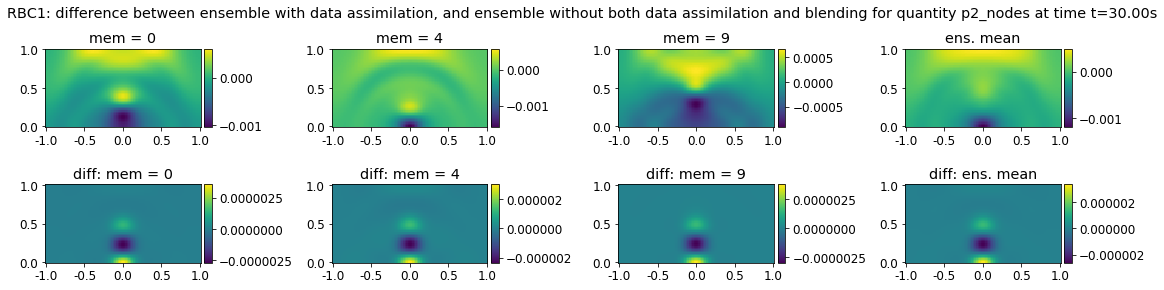

In [522]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

# ic = "delth"
e2 = None
ic = 0
datyp = 0

ics = {0:"vertperturb", 1:"delth"}
datyps = {0:"bo",1:"rloc",2:"noda"}
cb = False

ens_2 = True
ic_2 = ic
datyp_2 = 2
cb_2 = False

ic_case = ics[ic]
datyp_case = datyps[datyp]
suffix = "%s_%s" %(ic_case, datyp_case)

et = 10.0
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
time = 0.3

if cb == True:
    suffix = tc.cb_suffix(1,0,suffix)

N = 10

rect = [0, 0.03, 1, 0.96]
mems = [0,4,9]

attributes = ['p2_nodes']
# attributes = ['rho']
for attribute in attributes:
    fn = tc.get_filename(N,suffix)
    path = tc.get_path(fn)
    arrs = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=False)
    ens_mean = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=True)

#     fn = tc.get_filename(1,'comp')
#     path = tc.get_path(fn)
#     comp = tc.get_arr(path, time, 1, attribute, label_type='TIME', inner=True)

    if ens_2 == True:
        ic_case = ics[ic_2]
        datyp_case_2 = datyps[datyp_2]
        suffix = "%s_%s" %(ic_case, datyp_case_2)
        e2 = "noda" if datyp_2 == 2 else "da"
        if cb_2 == True:
            suffix = tc.cb_suffix(1,0,suffix)
            e2 = "dabld"
        fn = tc.get_filename(N,suffix)
        path = tc.get_path(fn)
        ens2_arrs = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=False)
        ens2_mean = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=True)
    
    fn = tc.get_filename(1,'psinc_delth_ref')
    path = tc.get_path(fn)
    psinc = tc.get_arr(path, time, 1, attribute, label_type='TIME', inner=True)

arr_lst_row0 = [[arr.T,"mem = %i" %n] for n,arr in enumerate(arrs)]
arr_lst_row0 = [arr_lst_row0[n] for n in mems]
arr_lst_row0.append([ens_mean.T,'ens. mean'])

if ens_2 == False:
    arr_lst_row1 = [[arr.T-psinc.T,"diff: mem = %i" %n] for n,arr in enumerate(arrs)]
    arr_lst_row1 = [arr_lst_row1[n] for n in mems]
    arr_lst_row1.append([ens_mean.T-psinc.T,'diff: mean diff'])
elif ens_2 == True:
    arr_lst_row1 = [[ens2_arr.T-arrs[n].T,"diff: mem = %i" %n] for n,ens2_arr in enumerate(ens2_arrs)]
    arr_lst_row1 = [arr_lst_row1[n] for n in mems]
    arr_lst_row1.append([ens2_mean.T-ens_mean.T,'diff: ens. mean'])

arr_lst = np.concatenate((arr_lst_row0,arr_lst_row1))

# arr_lst.append([comp.T-psinc.T,'mean diff'])
# arr_lst.append([ens_mean.T,'ensemble mean'])
# arr_lst.append([psinc.T-psinc.T.mean(),'comp diff'])

x_locs = np.arange(0,101,25)
x_axs = np.linspace(-1.0,1.0,5) 
y_locs = np.arange(0,51,25)
y_axs = np.linspace(0,1.0,3)

pl = pt.plotter(arr_lst, figsize=(16,6))

icc, nn1, nn2, e2_nn, ens2 = namer(ic,datyp,cb,e2=e2)
fn = '%s_%s_diff_%s_%s_%s' %(icc, datyp_case, nn1, e2_nn, str(time).replace(".",""))
suptitle_1 = r'%s: difference between ensemble %s, and %s for quantity %s at time t=%.2fs' \
%(icc, nn2, ens2, attribute, time*100)
pl.set_axes(x_locs=x_locs,x_axs=x_axs,y_locs=y_locs,y_axs=y_axs)
pl.plot(method='imshow',suptitle=suptitle_1, rect=rect,fontsize=12)

pl.save_fig(py_directory + fn)

# Ensemble Plotter

delth_noda
delth_rloc
delth_rloc_cont_blend_fs=1_ts=0


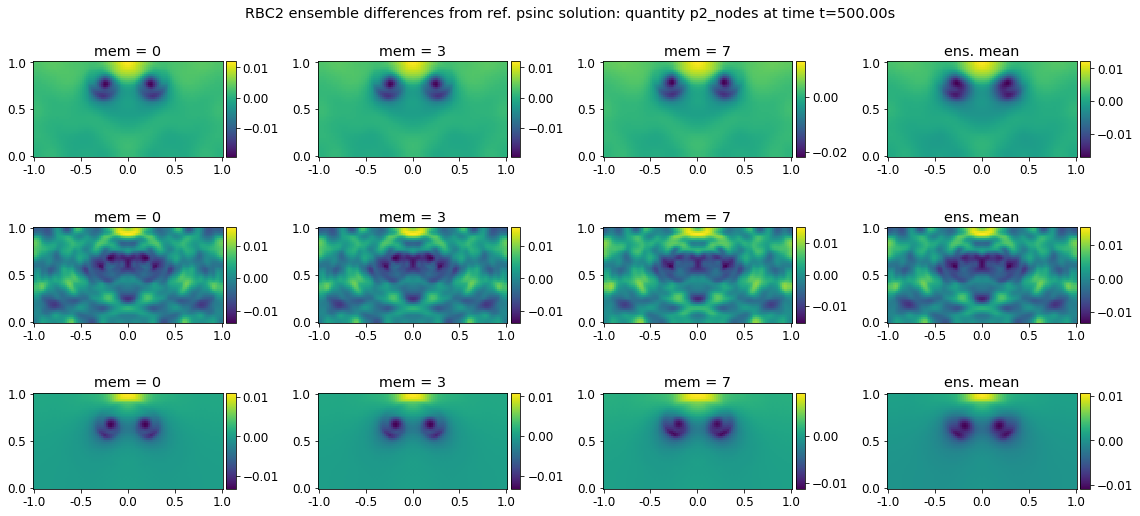

In [617]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

ics = {0:"vertperturb", 1:"delth"}
datyps = {0:"bo",1:"rloc",2:"noda"}

def get_suffix(ic,datyp,cb=False):
    ic = ics[ic]
    datyp = datyps[datyp]
    suffix = "%s_%s" %(ic, datyp)
    if cb == True:
        suffix = tc.cb_suffix(1,0,suffix)
    print(suffix)
    return suffix

ict = 1
datypt = 1
sfx_noda = get_suffix(ict,2)
sfx_da = get_suffix(ict,datypt)
sfx_dabld = get_suffix(ict,datypt,cb=True)

et = 5.0
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
time = 5.0

N = 10

rect = [0, 0.03, 1, 0.96]
mems = [0,3,7]

attributes = ['p2_nodes']
# attributes = ['rho']
for attribute in attributes:
    fn = tc.get_filename(N,sfx_noda)
    path = tc.get_path(fn)
    noda = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=False)
    noda_mean = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=True)

    fn = tc.get_filename(N,sfx_da)
    path = tc.get_path(fn)
    da = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=False)
    da_mean = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=True)
    
    fn = tc.get_filename(N,sfx_dabld)
    path = tc.get_path(fn)
    dabld = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=False)
    dabld_mean = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=True)
    
    fn = tc.get_filename(1,'psinc_delth_ref')
    path = tc.get_path(fn)
    psinc = tc.get_arr(path, time, 1, attribute, label_type='TIME', inner=True)

def stack_arr(arrs,mems,mean):
    arr_lst = [[arr.T,"mem = %i" %n] for n,arr in enumerate(arrs)]
    arr_lst = [arr_lst[n] for n in mems]
    arr_lst.append([mean.T,'ens. mean'])
    
    return arr_lst

def stack_diff(arrs0,arrs1,mems,mean,mean1):
    arr_lst = [[arr.T - arrs1[n].T,"mem = %i" %n] for n,arr in enumerate(arrs0)]
    arr_lst = [arr_lst[n] for n in mems]
    arr_lst.append([mean.T-mean1.T,'ens. mean'])
    
    return arr_lst

psincs = [psinc] * len(noda)
psincs = [np.zeros_like(psinc)] * len(noda)
psinc *= 0.0
row0 = stack_diff(noda,psincs,mems,noda_mean,psinc)
row1 = stack_diff(da,psincs,mems,da_mean,psinc)
row2 = stack_diff(dabld,psincs,mems,dabld_mean,psinc)

# row0 = stack_diff(da,noda,mems,da_mean,noda_mean)
# row1 = stack_diff(dabld,da,mems,dabld_mean,da_mean)
# row2 = stack_diff(dabld,noda,mems,dabld_mean,noda_mean)

rows = np.concatenate((row0,row1,row2))

x_locs = np.arange(0,101,25)
x_axs = np.linspace(-1.0,1.0,5) 
y_locs = np.arange(0,51,25)
y_axs = np.linspace(0,1.0,3)

pl = pt.plotter(rows, figsize=(16,10))

icc, nn1, nn2, e2_nn, ens2 = namer(ict,datypt,cb,e2=e2)
# fn = '%s_%s_diff_%s_%s_%s' %(icc, datyp_case, nn1, e2_nn, str(time).replace(".",""))
fn = "rloc_ensembles_%s" %str(time).replace(".","")
suptitle_1 = r'%s ensemble differences from ref. psinc solution: quantity %s at time t=%.2fs' %(icc, attribute, time*100)
pl.set_axes(x_locs=x_locs,x_axs=x_axs,y_locs=y_locs,y_axs=y_axs)
pl.plot(method='imshow',suptitle=suptitle_1, rect=rect,fontsize=12)

pl.save_fig(py_directory + fn)

# Ensemble Mean Plotter

In [1]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

ic = "vertperturb"
datyp = "bo"

et = 5.0
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
time = 5.0

N = 10

rect= [0, 0.03, 1, 1.4]

attributes = ['p2_nodes']
for attribute in attributes:

    suffix = "%s_%s" %(ic, datyp)
    fn = tc.get_filename(N,suffix)
    path = tc.get_path(fn)
    ens_mean_da = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=True)

    sfx = tc.cb_suffix(1,0,suffix)
    fn = tc.get_filename(N,sfx)
    path = tc.get_path(fn)
    ens_mean_da_bld = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=True)
    
    suffix = "%s_noda" %ic
    fn = tc.get_filename(N,suffix)
    path = tc.get_path(fn)
    ens_mean_noda = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=True)
    
    fn = tc.get_filename(1,'psinc_delth_ref')
    path = tc.get_path(fn)
    psinc = tc.get_arr(path, time, 1, attribute, label_type='TIME', inner=True)
    
    fn = tc.get_filename(1,'comp')
    path = tc.get_path(fn)
    comp = tc.get_arr(path, time, 1, attribute, label_type='TIME', inner=True)

# arr_lst = [[arr.T-psinc.T,"mem = %i" %n] for n,arr in enumerate(arrs)]

# arr_lst = [[arr.T,"mem = %i" %(n+1)] for n,arr in enumerate(arrs)]
arr_lst = []

arr_lst.append([ens_mean_da.T-psinc.T,'diff: ensemble mean w/ DA'])
arr_lst.append([ens_mean_da_bld.T-psinc.T,'diff: ensemble mean w/ DA and blending'])
arr_lst.append([ens_mean_noda.T-psinc.T,'diff: ensemble mean w/o DA'])
arr_lst.append([comp.T-psinc.T,'diff: comp - psinc'])

x_locs = np.arange(0,101,25)
x_axs = np.linspace(-1.0,1.0,5)
y_locs = np.arange(0,51,25)
y_axs = np.linspace(0,1.0,3)

pl = pt.plotter(arr_lst, figsize=(16,6))

fn = 'RBC2_bo_end_time'
suptitle_1 = r'RBC2: difference of ensemble mean at end time t = 5.0 from rel. psinc solution for quantity $\pi$'
pl.set_axes(x_locs=x_locs,x_axs=x_axs,y_locs=y_locs,y_axs=y_axs)
pl.plot(method='imshow',suptitle=suptitle_1, rect=rect)

pl.save_fig(py_directory + fn)

NameError: name 'Nx' is not defined